# IMDB Movie and Show Trend Analysis

## Objective: 
The purpose of this analysis is to uncover historical trends and performance indicators in movies and television shows using IMDb metadata spanning multiple decades. By examining factors such as genre popularity, release timelines, and IMDb scores, this project aims to provide data-driven recommendations for content studios—such as Netflix, Hulu, or major film studios—on what types of content to prioritize in future productions to maximize critical acclaim and viewer resonance.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## Data Cleaning

In [124]:
df1 = pd.read_csv("Titles.csv")  # Assuming Titles.csv is in the same directory as your script

In [125]:
import os

In [126]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [127]:
df1=df1.drop_duplicates(subset=['title'])
df1.dropna()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
86,ts22470,The Muppet Show,SHOW,Go behind the curtains as Kermit the Frog and ...,1976,TV-G,25,"['comedy', 'family', 'music']",['GB'],5.0,tt0074028,8.4,24278.0,12.641,8.1
109,ts28051,The Mickey Mouse Club,SHOW,A variety show featuring a cast of child perfo...,1955,TV-PG,31,"['family', 'music', 'comedy', 'drama']",['US'],3.0,tt0047757,7.6,779.0,7.194,5.8
120,ts24939,Spider-Woman,SHOW,When Jessica Drew was bitten by a poisonous sp...,1979,TV-PG,21,"['animation', 'fantasy', 'action', 'family']",['US'],1.0,tt0197911,5.8,790.0,19.081,8.0
204,ts20711,The Simpsons,SHOW,The satiric adventures of a working-class fami...,1989,TV-14,27,"['animation', 'comedy']",['US'],34.0,tt0096697,8.7,394764.0,516.381,7.9
208,ts15377,America's Funniest Home Videos,SHOW,America's Funniest Home Videos is the longest-...,1989,TV-PG,49,"['family', 'reality', 'comedy']",['US'],32.0,tt0098740,6.2,5356.0,18.117,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,ts280067,Growing Up Animal,SHOW,Follows the story of baby animals from their t...,2021,TV-G,2,['documentation'],['US'],1.0,tt13891272,8.3,94.0,3.339,7.0
1491,ts293637,Disney's Magic Bake-Off,SHOW,Splitting the kids between the ages of 6 and 1...,2021,TV-Y,46,"['family', 'reality']",['US'],1.0,tt14539670,5.7,66.0,1.643,8.0
1494,ts296175,Shark Attack Files,SHOW,Scientific experts research about the bizarre ...,2021,TV-14,42,['documentation'],['US'],1.0,tt14811706,6.4,22.0,1.665,10.0
1497,ts269588,Pixar Popcorn,SHOW,A collection of mini shorts starring some of y...,2021,TV-G,4,"['comedy', 'family', 'animation']",['US'],1.0,tt13634444,6.5,1932.0,11.805,7.4


In [128]:
df1.shape

(1500, 15)

## Exploratory Data Analysis on Movies and Shows

In [129]:
top5_rating = df1.sort_values(by='imdb_score', ascending = False, ignore_index=True).head()
pd.DataFrame(list(zip(top5_rating['title'],top5_rating['imdb_score'])),columns=['title','imdp rating']).set_index('title')

,imdp rating
title,
Bluey,9.7
The Wizard of Paws,9.4
Cosmos: A Spacetime Odyssey,9.3
Cosmos: Possible Worlds,9.1
Alaska Animal Rescue,9.0


In [130]:
#median of imdb score
pd.DataFrame(df1.groupby('type')['imdb_score'].median())

,imdb_score
type,
MOVIE,6.5
SHOW,7.0


In [131]:
# visualization of movie and show
col_name=[]
movies=[]
shows=[]
for i in range(1930,2025,10):
    q="from "+str(i)+" to "+str(i+10) 
    #the line q="from "+str(i)+" to "+str(i+10) creates a string q that represents a range of years from i to i+10.
    # str(i) converts the integer i to a string.#str(i+10) converts the integer i+10 to a string.
    
    col_name.append(q)
    # This line of code appends the string q, which represents a decade range (e.g., "from 1930 to 1940"), to the list col_name. This list is used to store the labels for each decade range.
    
    movies.append(df1[(df1['release_year']>=i) & (df1['release_year']<i+10)&(df1['type']=='MOVIE')]['id'].count())
    # df1['release_year']>=i and df1['release_year']<i+10 filter the DataFrame df1 to include only rows where the release_year is greater than or equal to i and less than i+10. 
    # This effectively filters the data to include only movies released within the current decade 
    # (df1['type']=='MOVIE') further filters the DataFrame to include only rows where the type column is 'MOVIE', ensuring that only movies are counted.
    # ['id'].count() calculates the number of rows (movies) in the filtered DataFrame and returns the count of movie IDs.
    
    shows.append(df1[(df1['release_year']>=i) & (df1['release_year']<i+10)&(df1['type']=='SHOW')]['id'].count())
    # same thing with shows, refer to the #s above for explanation of this line of code. 

m_a_s = pd.DataFrame(list(zip(col_name, movies,shows)),columns=['country','movies','shows'])
#zip combime col_name and movies and shows list into tuples, and each tuple contains one element from each list.
#Each tuple becomes a row in the DataFrame, with the first element of the tuple assigned to the 'country' column, 
#the second to the 'movies' column, and the third to the 'shows' column.
m_a_s

,country,movies,shows
0,from 1930 to 1940,35,0
1,from 1940 to 1950,42,0
2,from 1950 to 1960,51,2
3,from 1960 to 1970,28,0
4,from 1970 to 1980,36,3
5,from 1980 to 1990,44,10
6,from 1990 to 2000,110,25
7,from 2000 to 2010,241,38
8,from 2010 to 2020,330,211
9,from 2020 to 2030,175,118


/Users/henrylu/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



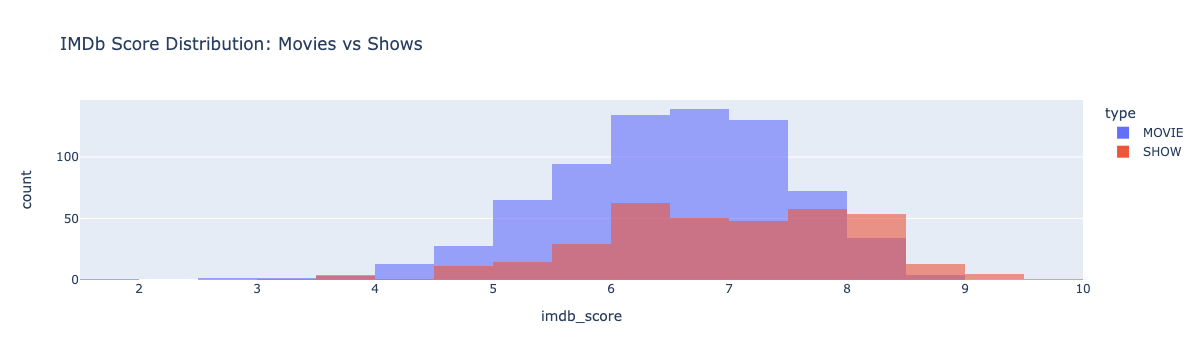

In [132]:
fig = px.histogram(
    df1,
    x='imdb_score',
    color='type',
    nbins=30,
    barmode='overlay',
    title='IMDb Score Distribution: Movies vs Shows',
    opacity=0.6
)
fig.show()

In [133]:
# Initialize dictionary for genre counts
genre_p = dict()

# Clean and count genres
for genres in df1['genres']:
    genres = str(genres).replace("'", "").replace('"', "")
    genres = list(genres.replace('[', '').replace(']', '').split(","))
    for genre in genres:
        genre = genre.strip()  # Remove leading/trailing whitespace
        if genre:  # Skip empty strings
            genre_p[genre] = genre_p.get(genre, 0) + 1

# Convert to DataFrame
df_genre = pd.DataFrame(list(genre_p.items()), columns=['genre', 'count'])

# Sort by count descending
df_genre = df_genre.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display top 15 genres
print(df_genre.head(15))

            genre  count
0          family    726
1          comedy    629
2       animation    472
3         fantasy    374
4   documentation    350
5           drama    333
6          action    288
7           scifi    255
8         romance    129
9           music     95
10          sport     63
11        reality     62
12       thriller     54
13          crime     45
14        history     41


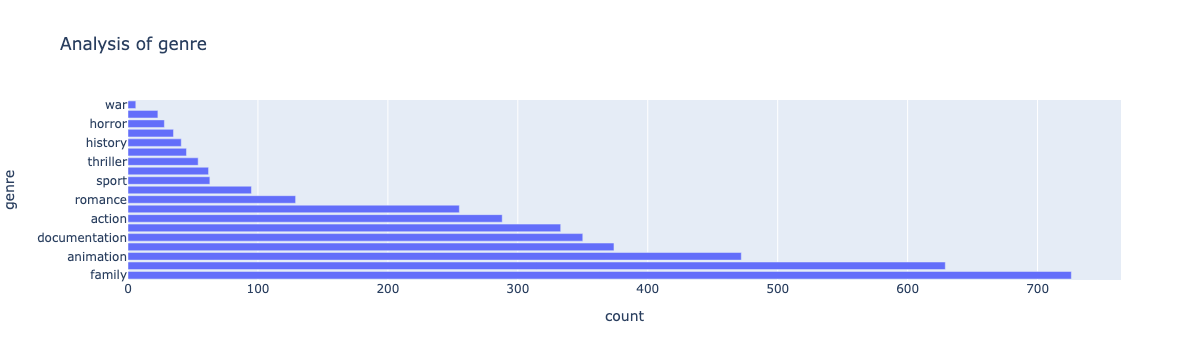

In [134]:
x=px.bar(df_genre,y='genre',x='count',title='Analysis of genre')
x.show()

# Text mining to find common themes or story elements in high-rated titles.



In [135]:
# Step 1: Define your curated theme list
theme_list = [
    'love', 'family', 'friendship', 'loss', 'grief', 'redemption',
    'survival', 'revenge', 'justice', 'freedom', 'identity',
    'betrayal', 'power', 'ambition', 'coming of age', 'sacrifice',
    'war', 'rescue', 'hope', 'adventure'
]

# Step 2: Get all high-rated descriptions (IMDb >= 8.0)
high_rated_desc = df1[(df1['imdb_score'] >= 8.0) & df1['description'].notnull()]['description'].str.lower()
desc_text = " ".join(high_rated_desc)

# Step 3: Count theme mentions
found_themes = {theme: desc_text.count(theme) for theme in theme_list if desc_text.count(theme) > 0}

# Step 4: Sort and display themes
sorted_themes = dict(sorted(found_themes.items(), key=lambda x: x[1], reverse=True))
print("Top Story Themes in High-Rated Movies:\n")
for theme, count in sorted_themes.items():
    print(f"{theme.capitalize():<20} : {count} mentions")


Top Story Themes in High-Rated Movies:

Adventure            : 13 mentions
War                  : 12 mentions
Love                 : 11 mentions
Family               : 8 mentions
Power                : 7 mentions
Survival             : 4 mentions
Rescue               : 4 mentions
Hope                 : 3 mentions
Friendship           : 2 mentions
Loss                 : 2 mentions
Justice              : 1 mentions
Freedom              : 1 mentions
Betrayal             : 1 mentions
Coming of age        : 1 mentions


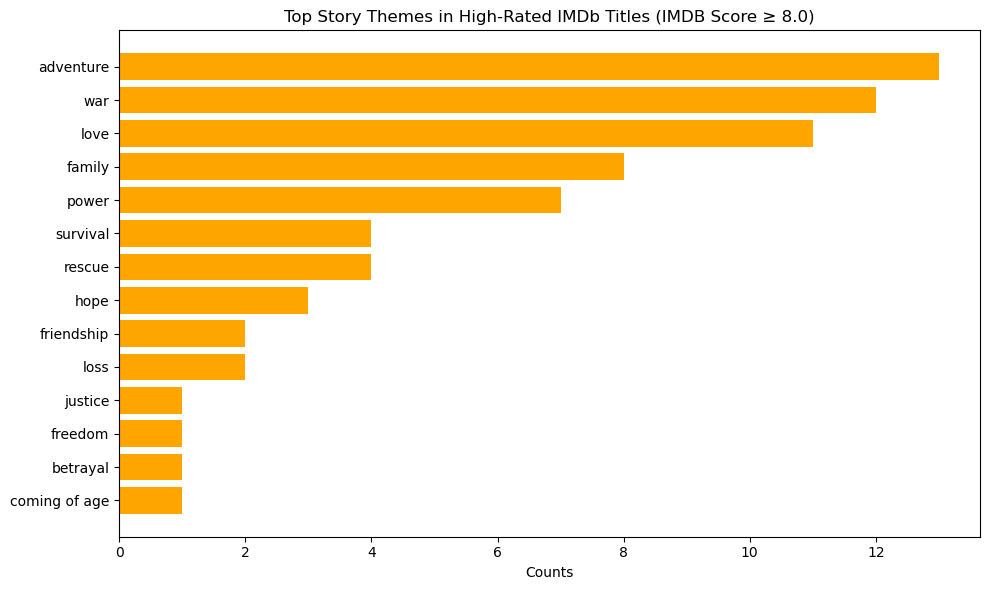

In [136]:
import matplotlib.pyplot as plt

# Plot chart directly from sorted_themes
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_themes.keys()), list(sorted_themes.values()), color='orange')
plt.xlabel("Counts")
plt.title("Top Story Themes in High-Rated IMDb Titles (IMDB Score ≥ 8.0)")
plt.gca().invert_yaxis()  # So most frequent theme is on top
plt.tight_layout()
plt.show()

# Summary: 
Genres with the highest historical production volume:Family (754), Comedy (649), Animation (486)
These genres consistently dominate cross-generational viewership, are globally exportable, and support ancillary revenue streams (e.g., toys, licensing, sequels) are prime for streaming.

The streaming boom started in 2010.
Adventure, war and romance and family among the popular theme with high IMDB score greater than 8.0.
Movie tend to have higher IMDB score and constantly have better score when done well versus tv shows. 



# Recommendation: 

## For Shows: 
Crime, history, thriller, while less frequent, have breakout potential. Limited series reduce risk but offer prestige returns.

A limited series format (6–10 episodes) allows for great length of storytelling, lower production risk and cost, and strong international licensing appeal.

Pairing Crime with elements of Mystery, Thriller, or Documentary-style realism taps into the success of some recent hybrid genre hits (e.g., Mindhunter, Narcos, Chernobyl).

## For Movies:
Theatrical audiences are shrinking and selective. Lean into scifi, history, drama — genres that create conversation and a reason to go out.

Best when centered on true stories or larger-than-life figure.
Should aim for cultural relevance: either through awards, innovation, or social conversation.

Fund 1–2 visually striking sci-fi projects per year with global themes

Anchor the studio’s prestige slate with one bold historical drama per year

Fund 1 genre-blending original film per year with breakout aesthetic or auteur appeal.
